# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: 

1. What are the different types of users who utilize the system?
2. When is the system most/least utilized? does that change based on the type of users?
3. what is the average system utilization time? does that change based on the type of users/

From a client/user persective, I'd be interested in asking about:

1. Service Quality, including availability, reliability and customer service.
2. Service Cost.

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [4]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [5]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = trip_reader.__next__()
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [6]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    # YOUR CODE HERE
    if city in ['NYC','Chicago']:
        duration = float(datum['tripduration'])/60
    else:
        duration = float(datum['Duration (ms)'])/60000
            
    return duration
    
# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [7]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # YOUR CODE HERE
    if city == 'NYC':
        tmp_dt = datetime.strptime(datum['starttime'],'%m/%d/%Y %H:%M:%S')
              
    elif city == 'Chicago':
        tmp_dt = datetime.strptime(datum['starttime'],'%m/%d/%Y %H:%M')
    else:
        tmp_dt = datetime.strptime(datum['Start date'],'%m/%d/%Y %H:%M') 
    
    month = int(tmp_dt.strftime('%#m'))
    hour = int(tmp_dt.strftime('%#H'))
    day_of_week = tmp_dt.strftime('%A')    
    
    return (month, hour, day_of_week)
    
    
# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [8]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    if city == 'NYC':
        user_type = datum['usertype']
              
    elif city == 'Chicago':
        user_type = datum['usertype']
    else:
       if datum['Member Type'] == 'Registered':
           user_type = 'Subscriber'
       else:
           user_type = 'Customer' 
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [9]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w', newline='') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}
            tof = []
            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration'] = duration_in_mins(row, city)
            tof = time_of_trip(row, city)
            new_point['month'] = tof[0] 
            new_point['hour'] = tof[1]
            new_point['day_of_week'] = tof[2]
            new_point['user_type'] = type_of_user(row, city)
            
            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            

In [10]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 
1. The city that has the highest number of trips is **NYC** with **276798**, next comes **Chicago** with **72131**, and third comes **Washington** with **66326**
2. The city with the hightest proportion of trips made by **subscribers** is **NYC** with **88.84%**
3. The city with the hightest proportion of trips made by **short term customers** is **Chicago** with **23.77%**

In [11]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        prop_subscribers = '{0:.2%}'.format(n_subscribers/n_total)
        prop_customers = '{0:.2%}'.format(n_customers/n_total)
        
        # return tallies as a tuple
        return(n_total, n_subscribers, prop_subscribers, n_customers, prop_customers)

In [12]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

data_files = ['./data/Washington-2016-Summary.csv', './data/Chicago-2016-Summary.csv', './data/NYC-2016-Summary.csv']
stat1 = {}
for data_file in data_files:
    city = data_file.split('-')[0].split('/')[-1]
    stat1 [city] = {}
    stat1 [city]['total no. of trips'] = number_of_trips(data_file)[0]
    stat1 [city]['no. of subscribers'] = number_of_trips(data_file)[1]
    stat1 [city]['proportion of subscribers'] = number_of_trips(data_file)[2]
    stat1 [city]['no. of customers'] = number_of_trips(data_file)[3]
    stat1 [city]['proportion of customers'] = number_of_trips(data_file)[4]
pprint(stat1)

{'Chicago': {'no. of customers': 17149,
             'no. of subscribers': 54982,
             'proportion of customers': '23.77%',
             'proportion of subscribers': '76.23%',
             'total no. of trips': 72131},
 'NYC': {'no. of customers': 30902,
         'no. of subscribers': 245896,
         'proportion of customers': '11.16%',
         'proportion of subscribers': '88.84%',
         'total no. of trips': 276798},
 'Washington': {'no. of customers': 14573,
                'no. of subscribers': 51753,
                'proportion of customers': '21.97%',
                'proportion of subscribers': '78.03%',
                'total no. of trips': 66326}}


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 
1. **Washington**: the average trip duration is **18.93 minutes**, and the proporation of rides longer than 30 minutes is **10.84%**
2. **Chicago**: the average trip duration is **16.56 minutes**, and the proporation of rides longer than 30 minutes is **8.33%**
3. **NYC**: the average trip duration is **15.81 minutes**, and the proporation of rides longer than 30 minutes is **7.30%**

In [13]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

def average_duration(filename):
    
    with open(filename, 'r') as f_in:
        
        reader = csv.DictReader(f_in)
        
        # calculate the total duration in minutes
        duration_total = 0.0
        duration_val = 0.0
        counter = 0
        no_of_trips_longer_than_30_minutes = 0
        for row in reader:
            duration_val = float(row['duration'])
            duration_total += duration_val
            counter += 1
            if duration_val > 30:
                no_of_trips_longer_than_30_minutes += 1
                        
        # calculate the average duration
        avg_duration = 0.0
        avg_duration = round(duration_total/counter,2)
        prop_trips_longer_than_30_min = '{0:.2%}'.format(no_of_trips_longer_than_30_minutes/counter)
        return (avg_duration, prop_trips_longer_than_30_min)
    
data_files = ['./data/Washington-2016-Summary.csv', 
              './data/Chicago-2016-Summary.csv', 
              './data/NYC-2016-Summary.csv']

for data_file in data_files:
    city = data_file.split('-')[0].split('/')[-1]
    print(city, average_duration(data_file)) 

Washington (18.93, '10.84%')
Chicago (16.56, '8.33%')
NYC (15.81, '7.30%')


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**:
1. **Washington** 
   <br>Average Subscriber trip duration: **12.53**
   <br>Average Customer trip duration: **41.68**
   <br>Difference (Cust. Avg. - Subs. Avg.) = **29.15**
2. **Chicago** 
   <br>Average Subscriber trip duration: **12.07** 
   <br>Average Customer trip duration: **30.98**
   <br>Difference (Cust. Avg. - Subs. Avg.) = **18.91**
3. **NYC**
   <br>Average Subscriber trip duration: **13.68** 
   <br>Average Customer trip duration: **32.98**
   <br>Difference (Cust. Avg. - Subs. Avg.) = **19.30**

In [14]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

def avg_duration_per_user_type(filename):
    
    with open(filename, 'r') as f_in:
        
        reader = csv.DictReader(f_in)
        
        # calculate the total duration in minutes
        subs_total_dur = 0.0
        cust_total_dur = 0.0
        subs_counter = 0
        cust_counter = 0
        subs_avg_dur = 0.0
        cust_avg_dur = 0.0
        diff_in_avg_dur_tmp = 0.0
        diff_in_avg_dur = 0.0
        
        # Total duration per user type
        for row in reader:
            if row['user_type'] == 'Subscriber':
                subs_total_dur +=  float(row['duration'])
                subs_counter += 1
            elif row['user_type'] == 'Customer':
                cust_total_dur += float(row['duration'])
                cust_counter += 1
        
        # calculate average duration per user type 
        
        subs_avg_dur = round(subs_total_dur/subs_counter,2)
        cust_avg_dur = round(cust_total_dur/cust_counter,2)
        diff_in_avg_dur_tmp = cust_avg_dur - subs_avg_dur
        
        # calculate the average duration
        return (subs_avg_dur, cust_avg_dur, diff_in_avg_dur)

data_files = ['./data/Washington-2016-Summary.csv', 
              './data/Chicago-2016-Summary.csv', 
              './data/NYC-2016-Summary.csv']

for data_file in data_files:
    city = data_file.split('-')[0].split('/')[-1]
    print(city, '\n','Average Subscriber trip duration:', avg_duration_per_user_type(data_file)[0], 
          '\n', 'Average Customer trip duration:', avg_duration_per_user_type(data_file)[1], 
          '\n', 'Difference between the two averages:', avg_duration_per_user_type(data_file)[2])

Washington 
 Average Subscriber trip duration: 12.53 
 Average Customer trip duration: 41.68 
 Difference between the two averages: 0.0
Chicago 
 Average Subscriber trip duration: 12.07 
 Average Customer trip duration: 30.98 
 Difference between the two averages: 0.0
NYC 
 Average Subscriber trip duration: 13.68 
 Average Customer trip duration: 32.98 
 Difference between the two averages: 0.0


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

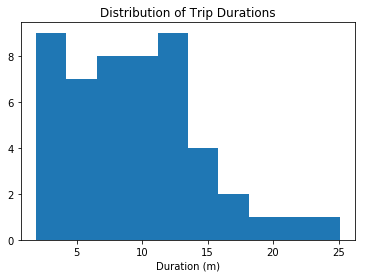

In [15]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

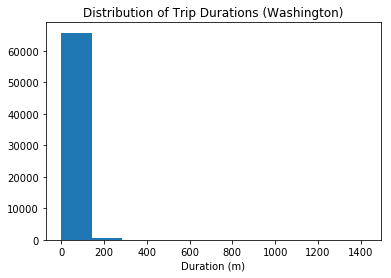

In [16]:
import matplotlib.pyplot as plt
import csv

def extract_durations_to_list(filename):
    
    duration_list = []
    subs_duration_list = []
    cust_duration_list = []
    
    with open(filename,'r') as f_in:
        reader = csv.DictReader(f_in)
        tmp_dur = 0.0
        for row in reader:
            duration_list.append(round(float(row['duration']),2))
            if row['user_type'] == 'Subscriber':
                subs_duration_list.append(round(float(row['duration']),2))
            elif row['user_type'] == 'Customer':
                cust_duration_list.append(round(float(row['duration']),2))
             
    return (duration_list, subs_duration_list, cust_duration_list)

data_file_1 = './data/Washington-2016-Summary.csv'
data_file_2 = './data/Chicago-2016-Summary.csv'
data_file_3 = './data/NYC-2016-Summary.csv'

data1 = extract_durations_to_list(data_file_1)[0]
data2 = extract_durations_to_list(data_file_2)[0]
data3 = extract_durations_to_list(data_file_3)[0]
    
%matplotlib inline 

plt.hist(data1)
plt.title('Distribution of Trip Durations (Washington)')
plt.xlabel('Duration (m)')
plt.show()

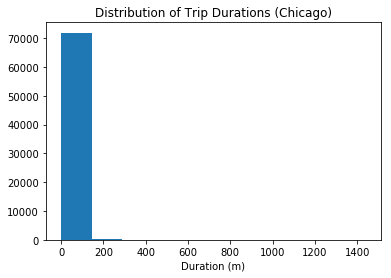

In [17]:
plt.hist(data2)
plt.title('Distribution of Trip Durations (Chicago)')
plt.xlabel('Duration (m)')
plt.show()

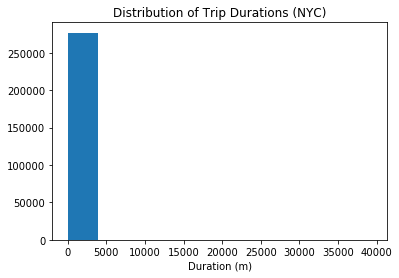

In [18]:
plt.hist(data3)
plt.title('Distribution of Trip Durations (NYC)')
plt.xlabel('Duration (m)')
plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: The selected city is: ** Washington**
<br> For the **subscribers** group, per the histogram below, the peak is reached at bucket no. 2 **(between 5 and 9)**. 
<br> For the **customers** group, per the histogram below, the peak is reached at bucket no. 4 **(between 15 and 19)**. 
<br> Both distributions have a bell-shaped curve, however, as the data is not symmetrical, it is cannot be considered as normal distribution. the Customers group distribution shows more symmetry and the curve is similar to a normal distribution graph as the trips times gradually increasing from zero to reach its peak at (bucket no. 4: 15 - 19), where in the case of the subsribers group distribution, the acceleration from zero to the peak (bucket no. 2: 5 - 9) is faster, and the curve looks similar to skewed distribution.

In [19]:
### Create lists of durations for subscibers and customers using 
### the function extract_durations_to_list

data_file = './data/Washington-2016-Summary.csv'
All_users_duration_list = extract_durations_to_list(data_file)[0]
Subscribers_duration_List = extract_durations_to_list(data_file)[1]
Customers_duration_list = extract_durations_to_list(data_file)[2]

In [20]:
### Set up the bin based on 5-minute wide intervals and 75 minute 
### limit as stated above

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]

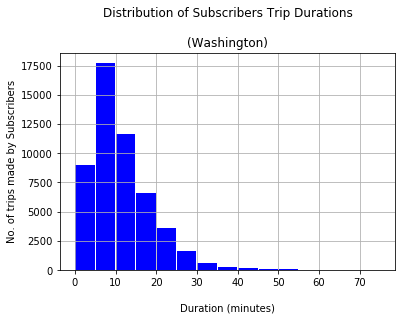

In [21]:
### Plot the distribution of trip times for the Subscribers in the 
### city of Washington

from pylab import *
plt.hist(Subscribers_duration_List, bins, histtype='bar', rwidth=0.95, color='b')
plt.title('Distribution of Subscribers Trip Durations\n\n(Washington)')
plt.xlabel('\nDuration (minutes)')
plt.ylabel('No. of trips made by Subscribers')
grid(True)
plt.show()

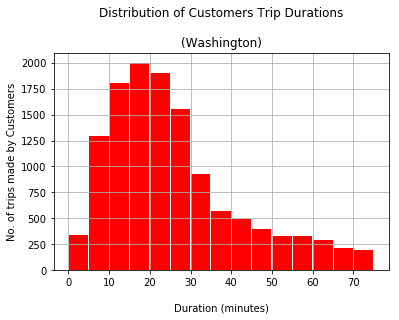

In [22]:
### Plot the distribution of trip times for the Customers in the 
### city of Washington

plt.hist(Customers_duration_list, bins, histtype='bar', rwidth=0.95, color='r')
plt.title('Distribution of Customers Trip Durations\n\n(Washington)')
plt.xlabel('\nDuration (minutes)')
plt.ylabel('No. of trips made by Customers')
grid(True)
plt.show()

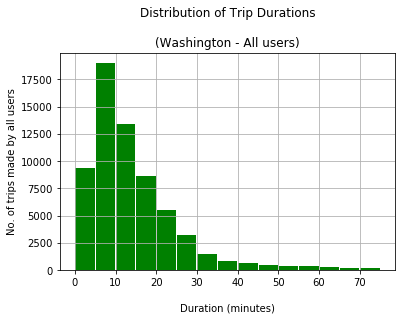

In [23]:
### Plot the distribution of trip times for all users in the 
### city of Washington

plt.hist(All_users_duration_list, bins, histtype='bar', rwidth=0.95, color='g')
plt.title('Distribution of Trip Durations\n\n(Washington - All users)')
plt.xlabel('\nDuration (minutes)')
plt.ylabel('No. of trips made by all users')
grid(True)
plt.show()

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**:

Selected city: **Washington**

**Q1**: How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?

**A1**: Looking at the bar charts below, we noted the numbers of subscribers and customers is higher during the summar season (June, July, August) as opposed to lower numbers during winter season (December, January, February). The number of subscribers reached their maximum in June (**5613 subscribers**) and their minimum in January (**2212 subscribers**), where customers reached maximum in July (**2186 customers**) and their minimum in January (**222 customers**). The Customers-to-Subscribers ratio reached its maximum in June (**0.42**) and its minimum in January (**0.1**)

**Q2**:Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?

**A2**: Per the bar chart below, the number of subscribers per day of week reached its maximum on Wednesday (**8520 subscribers**) and its mimimum on Sunday (**5252 subscribers**), where the number of customers per week of day reached its maximum on Saturday (**3311 customers**) and its minimum on Tuesday (**1426 customers**). The average duration of rides changes pending on the day of the week for both subscribers and customers, for example, for subscribers, the average duration reaches its maximum (**13.09**) on Saturday and its minimum (**12.17**) on Friday; where for customers, the average duration of rides reaches its maximum (44.59) on Saturday and its minimum (**36.37**) on Wednesday. Looking on the line chart below, we notice that the average duration of rides for subscribers experiences less changes (**std = 24.85**) than for customers which fluctuates more depending on the day of the week (**std = 65.60**). I also calculated the median and quantile and noted they have a similar behaviour as the mean. By comparing the mean and median duration for both subscribers and customers, we note that the mean is greater than the median (right skewed distribution).

**Q3**: During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

**A3**: looking at the charts showing the number of subscribers and customers per hour, we noted the system utilization goes significantly down between 12 AM to 4 AM and then starts increasing again to reach its maximum in the afternoon time. Looking at the last (line) chart (No. of users (per hour)), we noted that the subscribers line has two significant peaks (**8AM** and **5 PM**) where for customers the utilization is slowly increasing to reach its maximum at **2 PM**.

Subscribers (per month):
[2212, 2571, 4383, 4410, 4520, 5613, 5155, 5392, 5204, 5232, 4139, 2922]
Customers (per month):
[222, 283, 1188, 1192, 1248, 1707, 2186, 1806, 1674, 1560, 1075, 432]


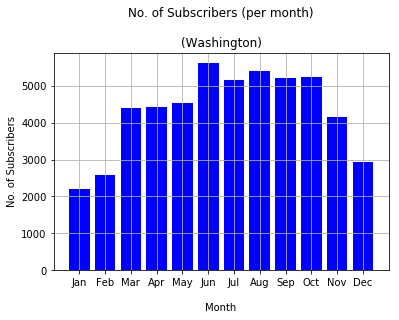

In [27]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above. ##

### This function takes on argument (filename) and returns 3 lists, the first ### 
### is the number of subscribers per month, the second is the number of       ###
### customers per month and the third is the ratio of customers to            ###
### subscribers per month                                                     ### 

import matplotlib.pyplot as plt
import csv
from collections import Counter
from __future__ import division

def users_by_Month(datafile):
    
    from collections import Counter
    
    subs_freq_by_month = []
    cust_freq_by_month = []
    
    with open(datafile,'r') as f_in:
        reader = csv.DictReader(f_in)
        for row in reader:
            if row['user_type'] == 'Subscriber':
                subs_freq_by_month.append(row['month'])
            elif row['user_type'] == 'Customer':
                cust_freq_by_month.append(row['month'])
    subs_dict = {int(k):int(v) for k,v in dict(Counter(subs_freq_by_month)).items()}
    sorted_subs_dict = sorted(subs_dict.items(), key = lambda t: t[0])
    cust_dict = {int(k):int(v) for k,v in dict(Counter(cust_freq_by_month)).items()}
    sorted_cust_dict = sorted(cust_dict.items(), key = lambda t: t[0])
    subs_by_month = []
    cust_by_month = []
    
    for month in sorted_subs_dict:
        subs_by_month.append(month[1])
    
    for month in sorted_cust_dict:
        cust_by_month.append(month[1])
    
    cust_to_subs_ratio = [round(cust_by_month/subs_by_month,2) for cust_by_month, subs_by_month, in zip(cust_by_month, subs_by_month)]
    
    return (subs_by_month, cust_by_month, cust_to_subs_ratio)
    
month_x_axis = [1,2,3,4,5,6,7,8,9,10,11,12]
sub_per_month = users_by_Month(data_file_1)[0]
cust_per_month = users_by_Month(data_file_1)[1]
cust_to_sub_ratio = users_by_Month(data_file_1)[2]
my_xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

print('Subscribers (per month):')
print(sub_per_month)
print('Customers (per month):')
print(cust_per_month)

%matplotlib inline 
plt.xticks(month_x_axis, my_xticks)
plt.bar(month_x_axis,sub_per_month, color = 'b')
plt.title('No. of Subscribers (per month)\n\n(Washington)')
plt.xlabel('\nMonth')
plt.ylabel('No. of Subscribers')
grid(True)
plt.show()

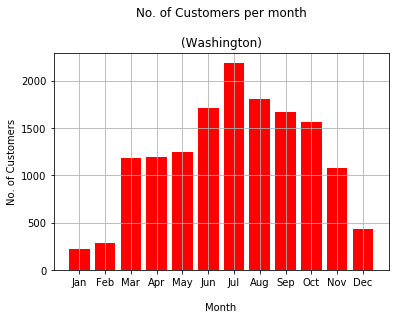

In [28]:
plt.xticks(month_x_axis, my_xticks)
plt.bar(month_x_axis,cust_per_month, color = 'r')
plt.title('No. of Customers per month\n\n(Washington)')
plt.xlabel('\nMonth')
plt.ylabel('No. of Customers')
grid(True)
plt.show()

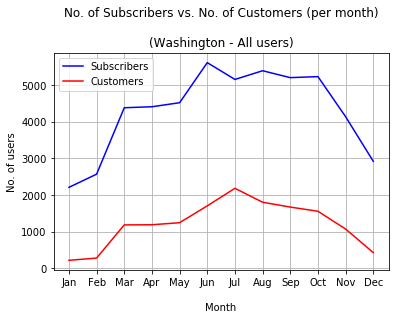

In [29]:
from pylab import *
plt.xticks(month_x_axis, my_xticks)
plt.plot(month_x_axis,sub_per_month, label = 'Subscribers', color = 'b')
plt.plot(month_x_axis,cust_per_month, label = 'Customers', color = 'r')
plt.xlabel('\nMonth')
plt.ylabel('No. of users')
plt.title('No. of Subscribers vs. No. of Customers (per month)\n\n(Washington - All users)')
plt.legend()
grid(True)
plt.show()

Customers-to-Subscribers ratio:
[0.1, 0.11, 0.27, 0.27, 0.28, 0.3, 0.42, 0.33, 0.32, 0.3, 0.26, 0.15]


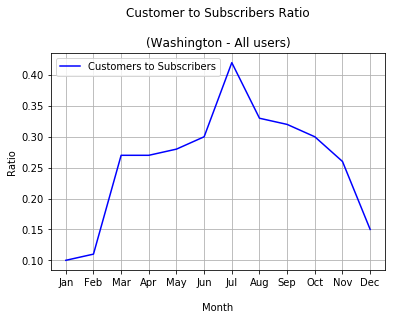

In [30]:
print('Customers-to-Subscribers ratio:')
print(cust_to_sub_ratio)
from pylab import *
plt.xticks(month_x_axis, my_xticks)
plt.plot(month_x_axis,cust_to_sub_ratio, label = 'Customers to Subscribers', color = 'b')
plt.xlabel('\nMonth')
plt.ylabel('Ratio')
plt.title('Customer to Subscribers Ratio\n\n(Washington - All users)')
plt.legend()
grid(True)
plt.show()

The number of subscribers per day of week (starting Monday):
[7658, 8322, 8520, 8454, 7958, 5589, 5252]


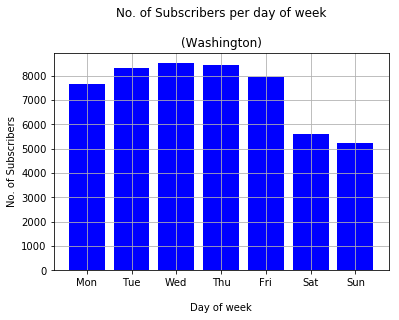

In [32]:
### create a function that takes one variable (data file) and returns two lists;     ###
### the two lists represent the number of subscribers and customers per day of week. ###

def users_by_day(datafile):
    
    subs_freq_by_day = []
    cust_freq_by_day = []
    
    with open(datafile,'r') as f_in:
        reader = csv.DictReader(f_in)
        for row in reader:
            if row['user_type'] == 'Subscriber':
               subs_freq_by_day.append(row['day_of_week'])
            elif row['user_type'] == 'Customer':
               cust_freq_by_day.append(row['day_of_week'])
    
    # Convert dictionary keys and values from string to integer
    
    subs_dict = dict(Counter(subs_freq_by_day))
    cust_dict = dict(Counter(cust_freq_by_day))

    # Sort the dictionary based on key values
    
    ind = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sorted_subs_dict = sorted(subs_dict.items(), key= lambda i:ind.index(i[0]))
    sorted_cust_dict = sorted(cust_dict.items(), key= lambda i:ind.index(i[0]))
    
    subs_by_day_of_week = []
    cust_by_day_of_week = []
    
    for day in sorted_subs_dict:
        subs_by_day_of_week.append(day[1])
    
    for day in sorted_cust_dict:
        cust_by_day_of_week.append(day[1])    
    return (subs_by_day_of_week, cust_by_day_of_week)    

x = [1,2,3,4,5,6,7]
y1,y2 = users_by_day(data_file_1)

print('The number of subscribers per day of week (starting Monday):')
print(y1)

my_xticks = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.xticks(x, my_xticks)
plt.bar(x,y1, label = 'Subscribers', color = 'b')
plt.title('No. of Subscribers per day of week\n\n(Washington)')
plt.xlabel('\nDay of week')
plt.ylabel('No. of Subscribers')
grid(True)
plt.show()

The number of customers per day of week (starting Monday):
[1736, 1426, 1583, 1530, 2012, 3311, 2975]


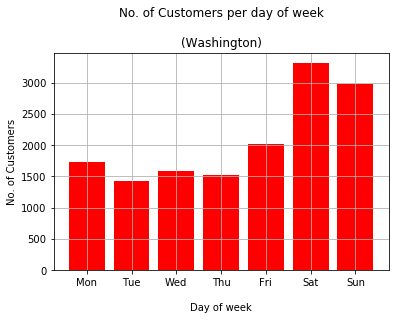

In [33]:
print('The number of customers per day of week (starting Monday):')
print(y2)

plt.xticks(x, my_xticks)
plt.bar(x,y2, label = 'Customers', color = 'r')
plt.title('No. of Customers per day of week\n\n(Washington)')
plt.xlabel('\nDay of week')
plt.ylabel('No. of Customers')
grid(True)
#plt.xlabel('Month')
plt.show()

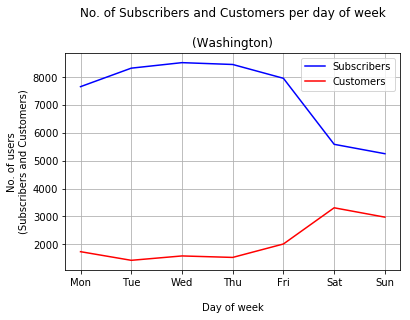

In [34]:
plt.xticks(x, my_xticks)
plt.plot(x,y1, label = 'Subscribers', color = 'b')
plt.plot(x,y2, label = 'Customers', color = 'r')
plt.title('No. of Subscribers and Customers per day of week\n\n(Washington)')
plt.xlabel('\nDay of week')
plt.ylabel('No. of users\n(Subscribers and Customers)')
plt.legend()
grid(True)
plt.show()

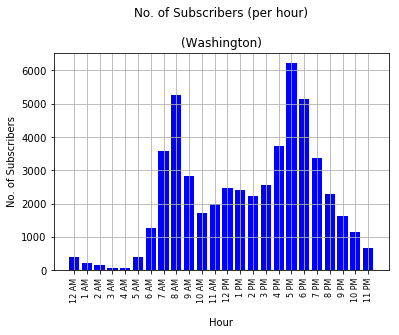

In [36]:
import matplotlib.pyplot as plt
import csv
from collections import Counter

def users_by_hour(datafile):
    
    from collections import Counter
    
    subs_freq_by_hour = []
    cust_freq_by_hour = []
    
    with open(datafile,'r') as f_in:
        reader = csv.DictReader(f_in)
        for row in reader:
            if row['user_type'] == 'Subscriber':
                subs_freq_by_hour.append(row['hour'])
            elif row['user_type'] == 'Customer':
                cust_freq_by_hour.append(row['hour'])
    subs_dict = {int(k):int(v) for k,v in dict(Counter(subs_freq_by_hour)).items()}
    sorted_subs_dict = sorted(subs_dict.items(), key = lambda t: t[0])
    cust_dict = {int(k):int(v) for k,v in dict(Counter(cust_freq_by_hour)).items()}
    sorted_cust_dict = sorted(cust_dict.items(), key = lambda t: t[0])
    subs_by_hour = []
    cust_by_hour = []

    for hour in sorted_subs_dict:
        subs_by_hour.append(hour[1])
    
    for hour in sorted_cust_dict:
        cust_by_hour.append(hour[1])    
    return (subs_by_hour, cust_by_hour)
    
x_axis = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
hr_xticks = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM','9 PM','10 PM','11 PM']
sub_per_hour = users_by_hour(data_file_1)[0]
cust_per_hour = users_by_hour(data_file_1)[1]


%matplotlib inline 
plt.xticks(x_axis, hr_xticks)
plt.xticks(fontsize=8, rotation=90)
plt.bar(x_axis,sub_per_hour, color = 'b')
plt.title('No. of Subscribers (per hour)\n\n(Washington)')
plt.xlabel('\nHour')
plt.ylabel('No. of Subscribers')
grid(True)
plt.show()


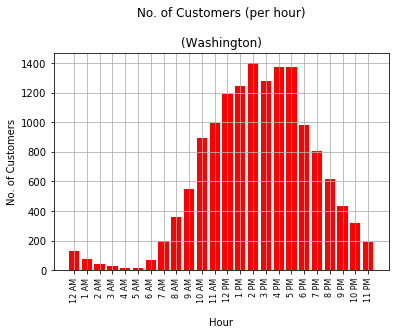

In [37]:
plt.xticks(x_axis, hr_xticks)
plt.xticks(fontsize=8, rotation=90)
plt.bar(x_axis,cust_per_hour, color = 'r')
plt.title('No. of Customers (per hour)\n\n(Washington)')
plt.xlabel('\nHour')
plt.ylabel('No. of Customers')
grid(True)
plt.show()

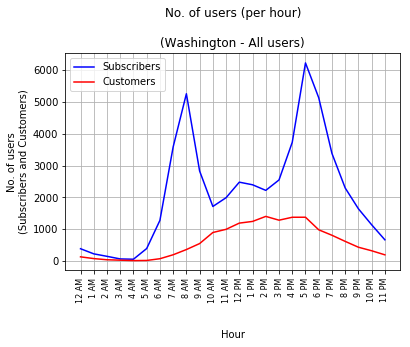

In [44]:
plt.xticks(x_axis, hr_xticks)
plt.xticks(fontsize=8, rotation=90)
plt.plot(x_axis,sub_per_hour, label = 'Subscribers', color = 'b')
plt.plot(x_axis,cust_per_hour, label = 'Customers', color = 'r')
plt.title('No. of users (per hour)\n\n(Washington - All users)')
plt.xlabel('\n\nHour')
plt.ylabel('No. of users\n(Subscribers and Customers)')
plt.legend()
grid(True)
plt.show()

In [39]:
### In response to the reviewer comments, we are going to use Pandas   
### to re-generate the charts above and incorporate dataframes for     
### more efficiency                                                    

import pandas as pd # Pandas version 0.20.3

### Create dataframe for Washington city

W_df = pd.read_csv('./data/Washington-2016-Summary.csv')

subs_only = W_df['user_type'] == 'Subscriber'
cust_only = W_df['user_type'] == 'Customer'

subs_df = W_df[subs_only]
cust_df = W_df[cust_only]

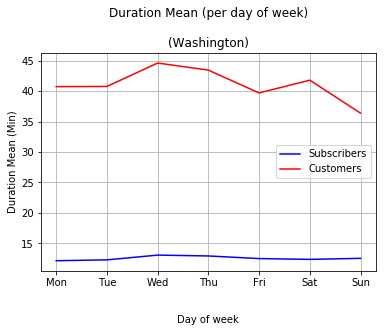

In [55]:
subs_dur_dow_mean = round(subs_df.groupby(['day_of_week'])['duration'].mean(),2)
cust_dur_dow_mean = round(cust_df.groupby(['day_of_week'])['duration'].mean(),2)
plt.xticks(x, my_xticks)
plt.plot(x,subs_dur_dow_mean, label = 'Subscribers', color = 'b')
plt.plot(x,cust_dur_dow_mean, label = 'Customers', color = 'r')
plt.title('Duration Mean (per day of week)\n\n(Washington)')
plt.xlabel('\n\nDay of week')
plt.ylabel('Duration Mean (Min)')
plt.legend()
grid(True)

In [56]:
round(W_df.groupby(['day_of_week','user_type'])['duration'].mean(),2)

day_of_week  user_type 
Friday       Customer      40.72
             Subscriber    12.17
Monday       Customer      40.75
             Subscriber    12.31
Saturday     Customer      44.59
             Subscriber    13.09
Sunday       Customer      43.43
             Subscriber    12.95
Thursday     Customer      39.69
             Subscriber    12.52
Tuesday      Customer      41.78
             Subscriber    12.39
Wednesday    Customer      36.37
             Subscriber    12.56
Name: duration, dtype: float64

In [57]:
round(W_df.groupby(['user_type'])['duration'].mean(),2)

user_type
Customer      41.68
Subscriber    12.53
Name: duration, dtype: float64

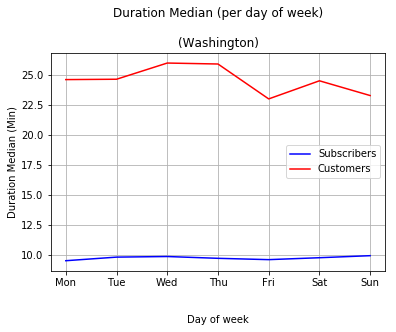

In [58]:
subs_dur_dow_median = round(subs_df.groupby(['day_of_week'])['duration'].median(),2)
cust_dur_dow_median = round(cust_df.groupby(['day_of_week'])['duration'].median(),2)
plt.xticks(x, my_xticks)
plt.plot(x,subs_dur_dow_median, label = 'Subscribers', color = 'b')
plt.plot(x,cust_dur_dow_median, label = 'Customers', color = 'r')
plt.title('Duration Median (per day of week)\n\n(Washington)')
plt.xlabel('\n\nDay of week')
plt.ylabel('Duration Median (Min)')
plt.legend()
grid(True)

In [59]:
round(W_df.groupby(['day_of_week','user_type'])['duration'].median(),2)

day_of_week  user_type 
Friday       Customer      24.60
             Subscriber     9.50
Monday       Customer      24.63
             Subscriber     9.80
Saturday     Customer      25.98
             Subscriber     9.85
Sunday       Customer      25.90
             Subscriber     9.70
Thursday     Customer      22.99
             Subscriber     9.59
Tuesday      Customer      24.50
             Subscriber     9.75
Wednesday    Customer      23.27
             Subscriber     9.92
Name: duration, dtype: float64

In [60]:
round(W_df.groupby(['user_type'])['duration'].median(),2)

user_type
Customer      24.90
Subscriber     9.73
Name: duration, dtype: float64

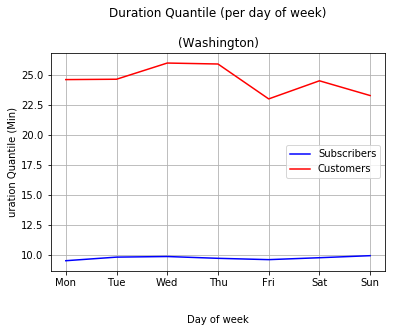

In [64]:
subs_dur_dow_quantile = round(subs_df.groupby(['day_of_week'])['duration'].quantile(),2)
cust_dur_dow_quantile = round(cust_df.groupby(['day_of_week'])['duration'].quantile(),2)
plt.xticks(x, my_xticks)
plt.plot(x, subs_dur_dow_quantile, label = 'Subscribers', color = 'b')
plt.plot(x, cust_dur_dow_quantile, label = 'Customers', color = 'r')
plt.title('Duration Quantile (per day of week)\n\n(Washington)')
plt.xlabel('\n\nDay of week')
plt.ylabel('uration Quantile (Min)')
plt.legend()
grid(True)

In [65]:
round(W_df.groupby(['day_of_week','user_type'])['duration'].quantile(),2)

day_of_week  user_type 
Friday       Customer      24.60
             Subscriber     9.50
Monday       Customer      24.63
             Subscriber     9.80
Saturday     Customer      25.98
             Subscriber     9.85
Sunday       Customer      25.90
             Subscriber     9.70
Thursday     Customer      22.99
             Subscriber     9.59
Tuesday      Customer      24.50
             Subscriber     9.75
Wednesday    Customer      23.27
             Subscriber     9.92
Name: duration, dtype: float64

In [66]:
round(W_df.groupby(['user_type'])['duration'].std(),2)

user_type
Customer      65.60
Subscriber    24.85
Name: duration, dtype: float64

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: There are many interesting topics that I'd like to apply data science technqiues on, for example, cryptocurrency. This topic is becoming more important and it would be great to learn how to analyze the market data to help investors make more informative decisions.

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.